# Word embeddings

**Information**


*** 
**Background information**



***
**Coding sources**

* 


***
**Aim of the code template**

Provide an example for a model call, which produces deterministic results.

## Get API key(s)

In [1]:
import os
import sys

# Assuming 'src' is one level down (in the current directory or a subdirectory)
path_to_src = os.path.join('src')  # Moves one level down to 'src' folder

# Add the path to sys.path
sys.path.append(path_to_src)

# Now you can import your API_key module
import API_key as key

# load local embedding model

In [2]:
from sentence_transformers import SentenceTransformer

model = SentenceTransformer(
    'dunzhang/stella_en_400M_v5',
    trust_remote_code=True,
    config_kwargs={"use_memory_efficient_attention": False, "unpad_inputs": False}
)

/home/fenn/Documents/env_python/lib/python3.12/site-packages/sentence_transformers/cross_encoder/CrossEncoder.py:13: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  from tqdm.autonotebook import tqdm, trange
Some weights of the model checkpoint at dunzhang/stella_en_400M_v5 were not used when initializing NewModel: ['new.pooler.dense.bias', 'new.pooler.dense.weight']
- This IS expected if you are initializing NewModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing NewModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


nice printing:

In [3]:
from rich import print

# Extract word embeddings

## Feature Extraction with `sentence_transformers`

The following begins by extracting features (embeddings) from the text data---numerical representations of the meaning of text---using the `sentence_transformers` package.

The code makes use of the `dunzhang/stella_en_400M_v5` model, which is a larger embedding model, to extract features from the sentences. The model will encode the sentences into 1024-dimensional vector representations. The cell will then print the features as a pandas dataframe for easy viewing. See model page: https://huggingface.co/Marqo/dunzhang-stella_en_400M_v5

In [4]:
import pandas as pd
from sentence_transformers import SentenceTransformer

# Define sentences
sentences = [
    "I feel great this morning",
    "I am feeling very good today",
    "I am feeling terrible"
]

# Extract features
features = model.encode(sentences)

# Print the features as a pandas dataframe
pd.DataFrame(features, index=sentences)

/home/fenn/Documents/env_python/lib/python3.12/site-packages/transformers/modeling_utils.py:1160: FutureWarning: The `device` argument is deprecated and will be removed in v5 of Transformers.
  warnings.warn(


,0,1,2,3,4,5,6,7,8,9,...,1014,1015,1016,1017,1018,1019,1020,1021,1022,1023
I feel great this morning,-0.273803,-0.263797,-1.662458,0.123033,-0.756290,0.698615,0.110668,-0.128599,-0.636786,-0.075833,...,0.887946,0.141224,-0.110844,0.754704,0.382694,-0.798626,-1.105588,-0.203037,-0.535024,-0.980099
I am feeling very good today,0.145963,-0.259172,-1.851646,0.306638,-0.757653,1.123267,0.027637,-0.479936,-0.392065,0.005086,...,0.904707,0.249545,0.067650,0.631296,-0.114174,-0.632552,-0.874013,-0.040664,-0.033335,-0.471507
I am feeling terrible,-0.313051,-0.363651,-1.008055,0.305495,-1.265285,-0.477211,-0.000079,-0.031176,-0.245443,0.308194,...,1.407357,0.985921,0.167890,0.614477,0.505929,-0.919984,-1.523541,0.141674,0.173089,-0.657564


In [5]:
features.shape

(3, 1024)

In [6]:
similarities = model.similarity(features, features)
print(similarities)

tensor([[1.0000, 0.8755, 0.6394],
        [0.8755, 1.0000, 0.6769],
        [0.6394, 0.6769, 1.0000]])

# For every single unique word compute embeddings

In [7]:
import pandas as pd
import os

# Define the absolute file path based on the current working directory
cwd = os.getcwd()
file_path = os.path.join(cwd, '..', '01_dataPreperation/outputs/LLM', 'uniqueWords_max3words.csv')  # Adjust path to correct location
# Read the CSV file into a pandas DataFrame
try:
    df_all = pd.read_csv(file_path, encoding='utf-8')
except FileNotFoundError:
    print(f"Error: The file '{file_path}' was not found.")
except Exception as e:
    print(f"An error occurred: {e}")

In [8]:
df_all

,typeWord,association
0,sustainable,abgasreinigung
1,bioinspired,aerodynamik
2,sustainable,akku wechselbar
3,sustainable,aktivismus
4,sustainable,aktivisten
...,...,...
455,sustainable,ökologie
456,sustainable,ökologisch
457,sustainable,ökonomie
458,sustainable,ökostrom


# for typeWord "sustainable"

In [9]:
df = df_all[df_all["typeWord"] == 'sustainable']
df.shape

(228, 2)

In [10]:
sentences = df['association'].dropna().tolist()
embeddings = model.encode(sentences)
# Assign embeddings back to DataFrame
# df.loc[df['association'].notna(), 'embeddings'] = list(embeddings)

/home/fenn/Documents/env_python/lib/python3.12/site-packages/transformers/modeling_utils.py:1160: FutureWarning: The `device` argument is deprecated and will be removed in v5 of Transformers.
  warnings.warn(


In [11]:
pd.DataFrame(embeddings, index=sentences)

,0,1,2,3,4,5,6,7,8,9,...,1014,1015,1016,1017,1018,1019,1020,1021,1022,1023
abgasreinigung,0.419556,0.011732,-2.783103,-0.158031,-0.644843,0.040851,0.357788,0.164208,0.751386,0.316418,...,1.582554,0.296471,0.313394,0.068625,0.138704,0.136646,-1.732259,0.336151,-0.174973,-1.268860
akku wechselbar,-0.156626,0.312310,-2.299529,-0.168480,-0.605839,-0.412504,0.270451,0.485022,0.296788,-0.706942,...,1.194703,0.486277,0.256215,0.191635,-0.121581,-1.003928,-1.334605,-0.084592,-0.245319,-1.165586
aktivismus,0.190089,1.208797,-2.260257,-0.727884,-0.422223,-0.441621,-0.475656,0.398212,0.541130,-0.938729,...,1.212438,0.119432,0.400764,-0.103178,0.024781,0.730079,-1.032168,-0.087518,-0.082446,-0.574846
aktivisten,0.219962,1.095649,-2.416973,-0.637451,-0.649234,0.105457,-0.297363,0.174032,0.719131,-0.825507,...,1.087374,0.152988,0.501212,-0.063071,-0.382918,0.542040,-0.768910,-0.221860,0.313280,-0.788994
atomkraft,0.264864,0.345545,-1.639212,-0.330998,0.361826,-0.101217,-0.257876,0.148036,1.064160,-0.057634,...,0.925736,0.401039,-0.708574,0.132517,0.175224,-0.437786,-0.660473,0.317585,-1.119860,-1.041948
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ökologie,0.309527,0.387282,-2.177233,-0.166353,-1.082627,-0.165142,-0.054098,0.295919,0.830904,-0.802523,...,1.061505,0.593361,1.316318,-0.192618,0.241839,-0.443470,-1.454578,-0.008350,0.660865,-1.039421
ökologisch,0.394827,0.254845,-2.117823,-0.085352,-1.099734,-0.188609,0.052226,-0.125217,0.765527,-0.677249,...,1.157906,0.573396,1.538955,-0.027659,0.232712,-0.381530,-1.625548,-0.034520,0.589406,-0.866415
ökonomie,0.495950,0.253920,-1.707714,0.131335,-0.870673,0.928364,-0.321440,0.631486,0.608378,-0.420750,...,1.395754,0.425891,0.564828,0.003320,-0.167451,0.233025,-1.539491,-0.636607,0.318172,-0.858902
ökostrom,0.510355,-0.123419,-1.938835,0.477901,-0.340668,-0.060536,-0.284681,-0.372907,0.591263,-0.883391,...,1.835517,0.812531,-0.291154,0.176236,0.111095,-0.725653,-0.913149,0.231478,-0.554104,-0.619114


In [12]:
similarities = model.similarity(embeddings, embeddings)
print(similarities[:5,:5])

tensor([[1.0000, 0.6732, 0.5976, 0.6243, 0.6060],
        [0.6732, 1.0000, 0.6322, 0.6574, 0.6417],
        [0.5976, 0.6322, 1.0000, 0.9027, 0.5306],
        [0.6243, 0.6574, 0.9027, 1.0000, 0.5438],
        [0.6060, 0.6417, 0.5306, 0.5438, 1.0000]])

Words are mapped to sentence embeddings and then **k-mean clustering** is applied:

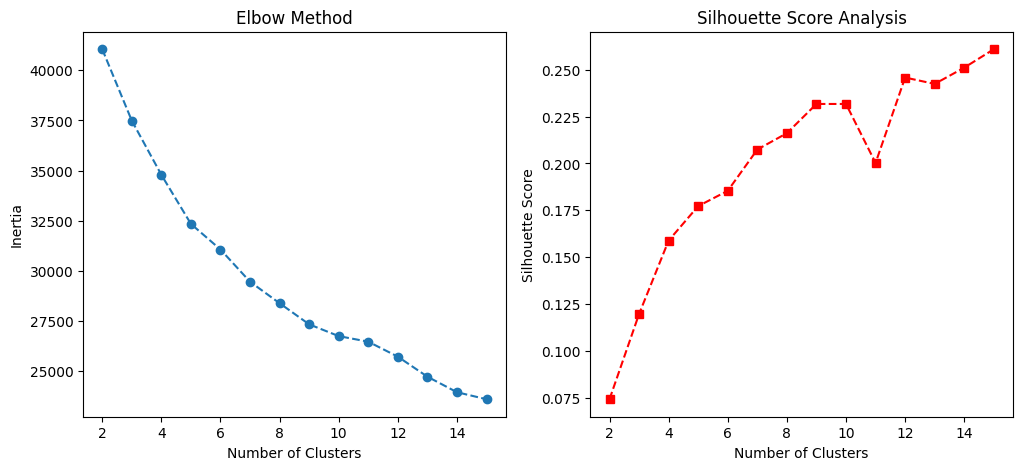

In [13]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# Sample embeddings (Replace with actual data)
# embeddings = np.array([...])  # Ensure this is a NumPy array of shape (n_samples, n_features)

def find_optimal_clusters(embeddings, max_k=15):
    inertia = []
    silhouette_scores = []

    for k in range(2, max_k + 1):
        kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
        kmeans.fit(embeddings)
        inertia.append(kmeans.inertia_)
        silhouette_scores.append(silhouette_score(embeddings, kmeans.labels_))

    # Plot Elbow Method
    plt.figure(figsize=(12, 5))
    
    plt.subplot(1, 2, 1)
    plt.plot(range(2, max_k + 1), inertia, marker='o', linestyle='--')
    plt.xlabel('Number of Clusters')
    plt.ylabel('Inertia')
    plt.title('Elbow Method')

    # Plot Silhouette Score
    plt.subplot(1, 2, 2)
    plt.plot(range(2, max_k + 1), silhouette_scores, marker='s', linestyle='--', color='red')
    plt.xlabel('Number of Clusters')
    plt.ylabel('Silhouette Score')
    plt.title('Silhouette Score Analysis')

    plt.show()

# Call function to visualize results
find_optimal_clusters(embeddings)


Sentences were mapped to sentence embeddings and then **hierarchical clustering** is applied:

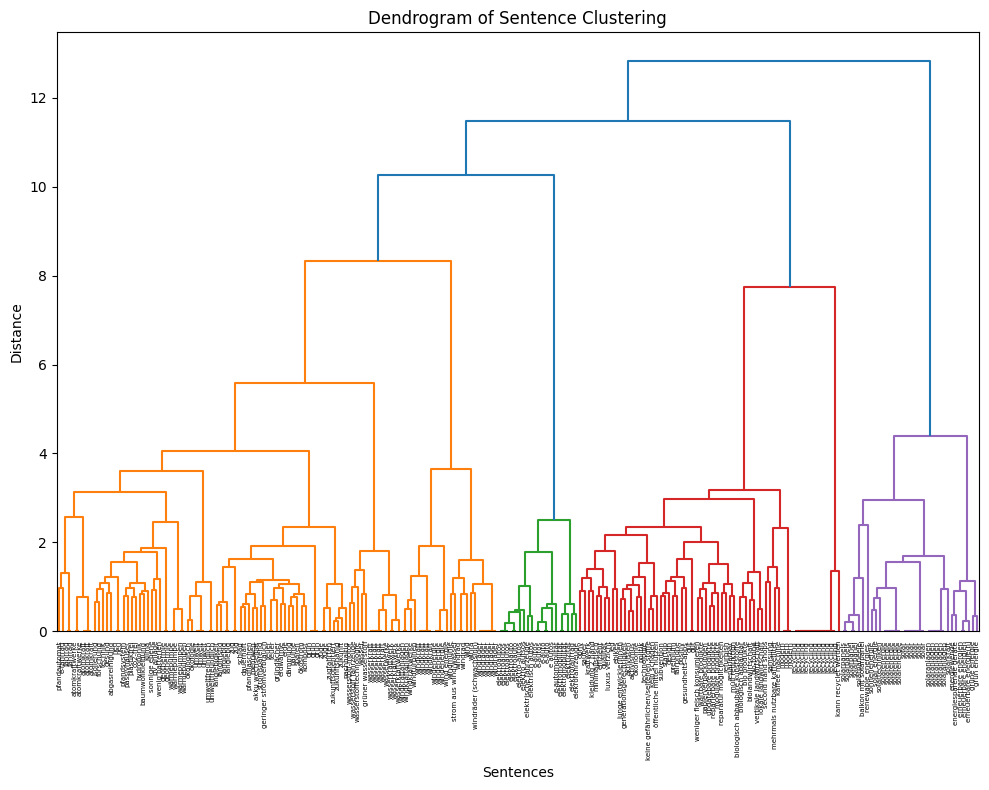

In [14]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics.pairwise import cosine_similarity
from scipy.cluster.hierarchy import dendrogram, linkage

# Calculate similarity matrix using cosine similarity
similarity_matrix = cosine_similarity(embeddings)

# Convert similarity matrix to a distance matrix
distance_matrix = 1 - similarity_matrix

# Perform hierarchical clustering
linked = linkage(distance_matrix, 'ward')

# Plot the dendrogram
plt.figure(figsize=(10, 8))
dendrogram(linked, labels=sentences, orientation='top', distance_sort='descending', show_leaf_counts=True)
plt.title("Dendrogram of Sentence Clustering")
plt.xlabel("Sentences")
plt.ylabel("Distance")
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

In [15]:
### appropriate number of clusters based on elbow and silhouette method
from sklearn.cluster import KMeans

# Choose the best k from the plots and apply KMeans
optimal_k = 7 # Change based on analysis
clustering_model = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
clustering_model.fit(embeddings)
cluster_assignment = clustering_model.labels_

# Organizing sentences into clusters
clustered_sentences = [[] for _ in range(optimal_k)]
for sentence_id, cluster_id in enumerate(cluster_assignment):
    clustered_sentences[cluster_id].append(sentences[sentence_id])

# Display results
for i, cluster in enumerate(clustered_sentences):
    print(f"Cluster {i + 1}:")
    print(cluster)
    print("")

Cluster 1:

[
    'bio-tonne',
    'biolandwirtschaft',
    'co2-frei',
    'energiesparende geräte',
    'energiewende',
    'erneuerbare energie(n)',
    'erneuerbare energien',
    'erneuerbare energien',
    'geothermie',
    'geothermie',
    'grün',
    'grün',
    'grün',
    'grün energie',
    'grüne energie',
    'grüner wasserstoff',
    'klima',
    'renewable energies.',
    'umwelt',
    'umwelt',
    'umwelt',
    'umweltfreundlich',
    'umweltfreundlich',
    'ökologie',
    'ökologisch'
]

Cluster 2:

[
    'balkon mit solarpanel',
    'solar',
    'solar',
    'solar',
    'solar',
    'solar',
    'solar',
    'solar energie',
    'solaranlagen',
    'solaranlagen',
    'solaranlagen',
    'solaranlagen',
    'solaranlagen',
    'solarenergie',
    'solarenergie',
    'solarenergie',
    'solarenergie',
    'solarenergie',
    'solarkraft',
    'solarpaneele',
    'solarpanel',
    'solarpanels',
    'solarpanels',
    'solarpänel',
    'solartechniken',
    'sonnenenergie'
]

Cluster 3:

[
    'strom aus wind/wasser',
    'wasser',
    'wasserkraft',
    'wasserkraft',
    'wasserkraft',
    'wasserkraft',
    'wasserkraftwerk',
    'wasserkraftwerk',
    'wasserkraftwerke',
    'wasserstoff fahrzeuge',
    'wasserstoff-motor',
    'wasserstofftechnologie',
    'wasserwerke'
]

Cluster 4:

[
    'kann recyclet werden',
    'recycling',
    'recycling',
    'recycling',
    'recycling',
    'recycling',
    'recycling',
    'recycling',
    'recycling',
    'recycling',
    'recycling',
    'recycling',
    'refurbish',
    'second hand shops'
]

Cluster 5:

[
    'e autos',
    'e-auto',
    'e-auto',
    'e-automobiltät',
    'e-autos',
    'e-autos',
    'e-fahrrad',
    'ebikes',
    'elekrofahrzeuge',
    'elektrisch autos',
    'elektrische fahrzeuge',
    'elektrizität',
    'elektro autsos',
    'elektro-autos',
    'elektroauto',
    'elektroauto',
    'elektroautos',
    'elektroautos',
    'elektroautos',
    'elektrofahrrad',
    'elektromobilität',
    'elektromobilität',
    'pfandautomat'
]

Cluster 6:

[
    'abgasreinigung',
    'akku wechselbar',
    'aktivismus',
    'aktivisten',
    'atomkraft',
    'atomkraft',
    'atomkraft',
    'atomkraftwerke',
    'atomkraftwerke',
    'baumwollkleidung',
    'bio produkte',
    'biologisch abbaubar',
    'biologisch abbaubare kunststoffe',
    'bäume',
    'dauerhaft',
    'design',
    'dämmung',
    'effizient',
    'erde',
    'erdwärme',
    'fahrrad',
    'fahrrad',
    'fairphone',
    'forschung',
    'generationsgerechtigkeit',
    'geringer stromverbrauch',
    'gesund',
    'gesundheits-apps',
    'gründächer',
    'gut',
    'gut',
    'hydroponik',
    'isolierung',
    'junge entwicklerinnen',
    'kaffee machine',
    'kein schaden',
    'keine gefährlichen/seltenen stoffe',
    'kleidung 2 hand',
    'kompost',
    'kraftwerk',
    'langfristig',
    'langlebig',
    'langlebig',
    'langlebigkeit',
    'led',
    'lokale landwirtschaft',
    'luxus verzicht',
    'mehrmals nutzbare kaffeefilter',
    'mehrweg',
    'minimalistisch',
    'modern',
    'modern',
    'modern',
    'modulare produkte',
    'müll reduktion',
    'nachhaltig',
    'neu',
    'neu',
    'papierverpackungen',
    'passivhäuser',
    'pfandflaschen',
    'pfandsystem',
    'plastikfrei',
    'politik',
    'positiv',
    'premium',
    'pv anlage',
    'qualität',
    'reparatur möglichkeiten',
    'reparierbar',
    'reparierbare produkte',
    'samsung',
    'sauber',
    'schlau',
    'sonnige ebene',
    'sparen',
    'startup',
    'stromsparend',
    'subvention',
    'technik',
    'technologie',
    'teuer',
    'teuer',
    'updatebare produkte',
    'vertikale landwirtschaft',
    'wartbare produkte',
    'wenig batterien',
    'weniger fleisch konsumieren',
    'wärmepumpe',
    'wärmepumpe',
    'wärmepumpen',
    'wärmepumpen',
    'zug',
    'zug',
    'zugfahrten',
    'zukunft',
    'zukunftshahig',
    'zukunftsorientiert',
    'züge',
    'züge',
    'öffentliche mittel nutzen',
    'ökonomie',
    'ökostrom',
    'öpnv'
]

Cluster 7:

[
    'wind',
    'wind energie',
    'windenergie',
    'windenergie',
    'windenergie',
    'windkraft',
    'windkraft',
    'windkraft',
    'windkraft',
    'windkraftanlagen',
    'windkraftanlagen',
    'windkraftwerke',
    'windmühle',
    'windrad',
    'windrad',
    'windräder',
    'windräder',
    'windräder',
    'windräder',
    'windräder',
    'windräder (schwachsinn)',
    'windturbinen',
    'winra'
]

In [16]:
len(clustered_sentences)

7

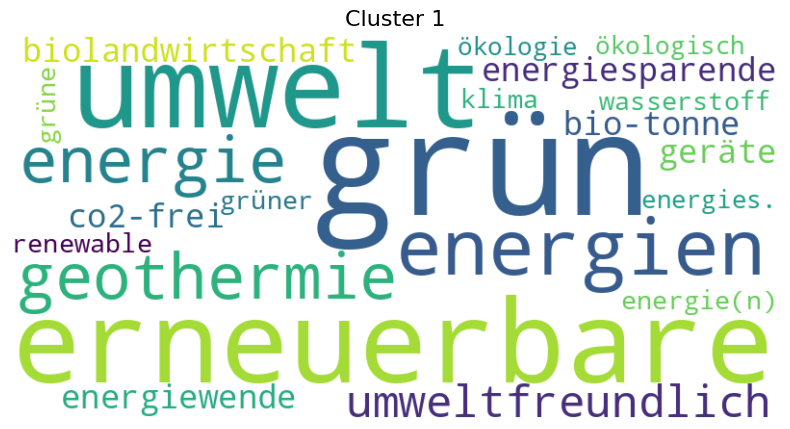

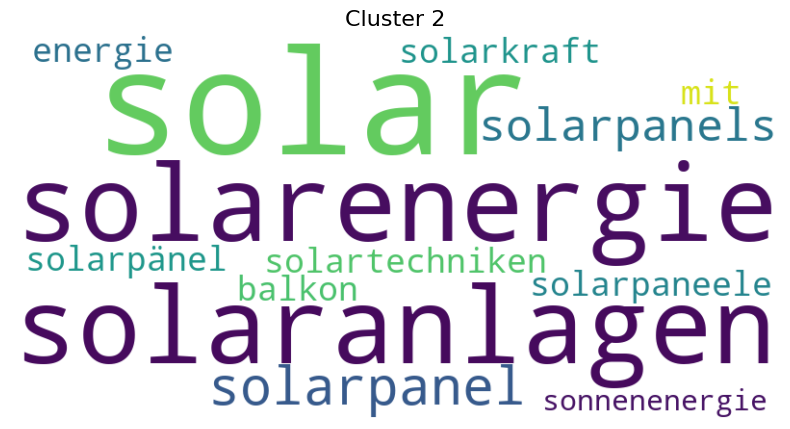

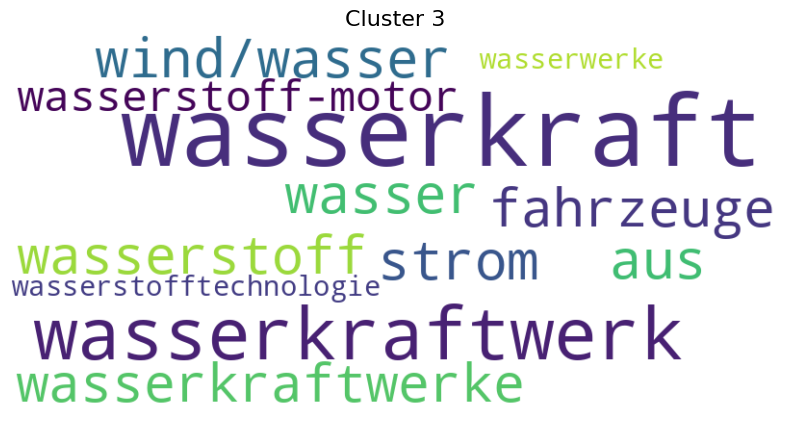

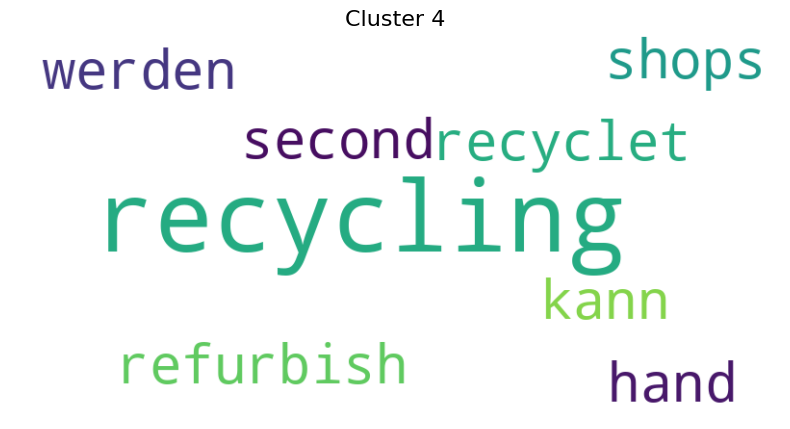

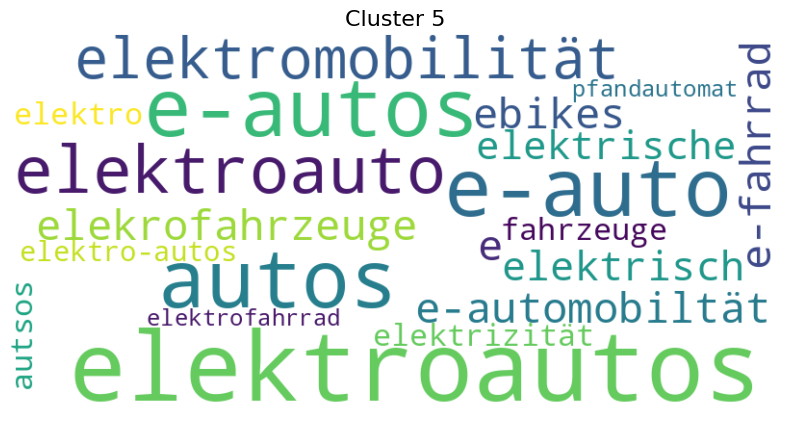

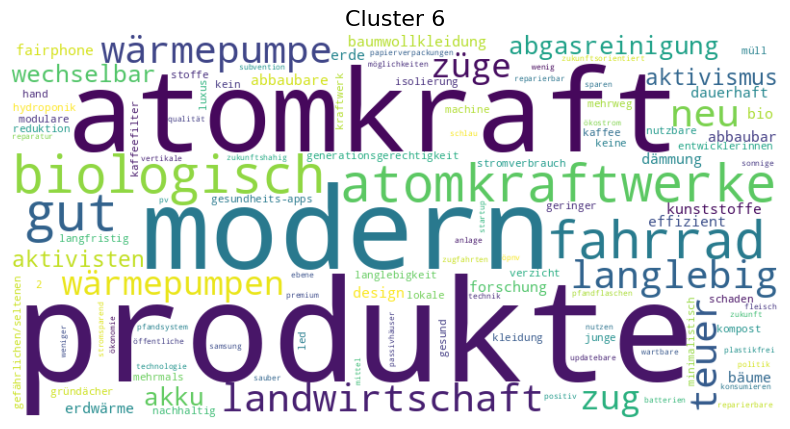

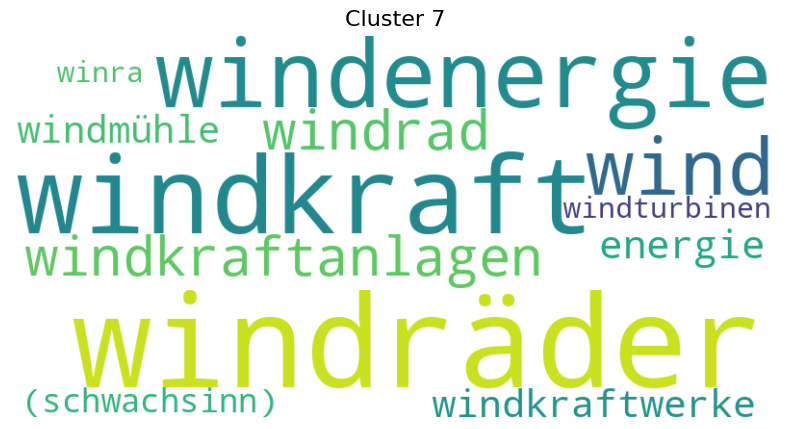

In [17]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from collections import Counter

# Create and display word clouds for each cluster
for i, cluster in enumerate(clustered_sentences):
    # Flatten all words into a single list (splitting on whitespace)
    all_words = []
    for phrase in cluster:
        words = phrase.lower().split()  # lowercasing for consistency
        all_words.extend(words)
    
    # Count word frequencies
    word_freq = Counter(all_words)
    
    # Generate the word cloud
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(word_freq)
    
    # Plot the word cloud
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(f'Cluster {i + 1}', fontsize=16)
    plt.show()


In [18]:
# Prompt for a sustainability researcher
sustainability_system_content = (
    "You are a cognitive scientist and sustainability researcher specializing in public perceptions of sustainable innovation. "
    "Your expertise includes conceptual modeling, narrative framing, and semantic network analysis within the domain of environmental psychology. "
    "You draw on frameworks such as the Three Pillar Model, SDGs, and cognitive-affective mapping to evaluate how individuals conceptualize sustainability. "
    "You interpret associations with methodological rigor, using validated tools such as mini-snowball tasks and semantic clustering."
)

sustainability_user_content = '''
Please analyze the following cluster of free word associations in the context of public perceptions 
of sustainable and bio-inspired technologies. Your task is to extract the most salient and recurring conceptual themes, 
grounded in empirical sustainability theory and environmental cognition.

Identify thematic convergence and semantic structures using models such as the Three Pillar Model and framing theory. 
Maintain scientific neutrality and avoid subjective interpretations. Structure your response according to validated 
semantic mapping frameworks (e.g., mini-snowball, small-world of words).

Associations: {cluster_associations}

Return only the emergent key themes as bullet points, explaining each theme in one scientifically grounded sentence. 
Provide no further commentary.
'''

# Example of integrating with a model for Cluster 0
from huggingface_hub import InferenceClient
import textwrap

client = InferenceClient(model="meta-llama/llama-3.3-70b-instruct", headers={"X-use-cache": "false"}, token=key.hugging_api_key)



for i, cluster in enumerate(clustered_sentences):
    print(f"Cluster {i + 1}:")
    print(", ".join(cluster))

    # Example: Running for the first cluster
    cluster_associations = ", ".join(clustered_sentences[i])  # Convert the first cluster's associations into a string
    formatted_user_content = sustainability_user_content.format(cluster_associations=cluster_associations)

    # Feed prompts into the model
    output = client.chat_completion(
        messages=[
            {"role": "system", "content": sustainability_system_content},
            {"role": "user", "content": formatted_user_content}
        ],
        stream=False,
        max_tokens=5000,
        temperature=0
    )

    # Accessing and formatting the output
    text = output.choices[0].message.content
    #print('\n'.join(textwrap.wrap(text, 100)))

    print(text)

Cluster 1:

bio-tonne, biolandwirtschaft, co2-frei, energiesparende geräte, energiewende, erneuerbare energie(n), erneuerbare 
energien, erneuerbare energien, geothermie, geothermie, grün, grün, grün, grün energie, grüne energie, grüner 
wasserstoff, klima, renewable energies., umwelt, umwelt, umwelt, umweltfreundlich, umweltfreundlich, ökologie, 
ökologisch

* **Renewable Energy**: This theme emerges as a central concept, encompassing various forms of sustainable energy 
sources, such as geothermie, erneuerbare energie(n), and grüne energie, which are perceived as crucial for reducing
CO2 emissions and mitigating climate change.
* **Environmental Protection**: The theme of umwelt and umweltfreundlich suggests a strong association with 
eco-friendly practices and the preservation of the natural environment, aligning with the principles of 
environmental psychology and sustainability.
* **Sustainable Technologies**: The presence of energiesparende geräte, energiewende, and grüner wasserstoff 
indicates a focus on innovative, eco-friendly technologies that contribute to a low-carbon future, reflecting the 
intersection of technology and sustainability.
* **Ecological Awareness**: The repeated mentions of ökologie, ökologisch, and grün imply a growing awareness of 
ecological issues and a desire for environmentally conscious practices, resonating with the Three Pillar Model's 
emphasis on social, economic, and environmental dimensions.
* **Climate Action**: The theme of klima and co2-frei highlights the importance of addressing climate change 
through sustainable practices and reduced carbon emissions, underscoring the urgency of environmental action and 
the role of individual and collective behaviors in mitigating its impacts.

Cluster 2:

balkon mit solarpanel, solar, solar, solar, solar, solar, solar, solar energie, solaranlagen, solaranlagen, 
solaranlagen, solaranlagen, solaranlagen, solarenergie, solarenergie, solarenergie, solarenergie, solarenergie, 
solarkraft, solarpaneele, solarpanel, solarpanels, solarpanels, solarpänel, solartechniken, sonnenenergie

* **Renewable Energy**: The dominant theme of renewable energy emerges, characterized by a strong association with 
solar power, reflecting a public perception of sustainability closely tied to the adoption of alternative energy 
sources.
* **Technological Innovation**: The frequent mention of solar panels and solar technology highlights a theme of 
technological innovation, indicating that the public views sustainable progress as closely linked to the 
development and implementation of new eco-friendly technologies.
* **Energy Self-Sufficiency**: The emphasis on solar energy and solar panels installed in personal spaces, such as 
balconies, suggests a theme of energy self-sufficiency, where individuals aspire to generate their own renewable 
energy, aligning with environmental psychology principles of personal control and agency.
* **Environmental Awareness**: The repetition of terms related to solar energy and technology implies an underlying
theme of environmental awareness, where the public recognizes the importance of transitioning to sustainable energy
sources to mitigate environmental impacts, consistent with the Three Pillar Model's environmental dimension.

Cluster 3:

strom aus wind/wasser, wasser, wasserkraft, wasserkraft, wasserkraft, wasserkraft, wasserkraftwerk, 
wasserkraftwerk, wasserkraftwerke, wasserstoff fahrzeuge, wasserstoff-motor, wasserstofftechnologie, wasserwerke

* **Renewable Energy**: The associations converge on the theme of renewable energy, particularly highlighting the 
importance of hydro power (wasserkraft, wasserkraftwerk) as a sustainable source of energy.
* **Water Resource Management**: The recurring mentions of "wasser" and related terms (wasserkraft, wasserstoff, 
wasserwerke) suggest a strong thematic focus on water resource management and its interlinkages with sustainable 
technologies.
* **Hydrogen Technology**: The presence of terms like "wasserstoff fahrzeuge", "wasserstoff-motor", and 
"wasserstofftechnologie" indicates a key theme of hydrogen technology as a bio-inspired and sustainable innovation.
* **Infrastructure and Technology**: The associations with "wasserkraftwerk" and "wasserwerke" imply a thematic 
emphasis on the infrastructure and technological aspects of sustainable energy and water management systems.

Cluster 4:

kann recyclet werden, recycling, recycling, recycling, recycling, recycling, recycling, recycling, recycling, 
recycling, recycling, recycling, refurbish, second hand shops

* **Waste Reduction**: The dominant theme of recycling and refurbishing reflects a public perception of sustainable
technology as a means to minimize waste and reduce environmental impact.
* **Circular Economy**: The emphasis on recycling, refurbishing, and second-hand shops indicates a conceptual 
understanding of sustainable systems as closed-loop processes that conserve resources and promote reuse.
* **Conservation of Resources**: The repetitive association with recycling suggests a strong cognitive link between
sustainable technologies and the conservation of natural resources, aligning with environmental psychology 
principles.
* **Sustainable Consumption**: The presence of second-hand shops and refurbishing in the associations implies a 
public recognition of sustainable consumption patterns as a crucial aspect of environmental sustainability, echoing
the Three Pillar Model's social dimension.

Cluster 5:

e autos, e-auto, e-auto, e-automobiltät, e-autos, e-autos, e-fahrrad, ebikes, elekrofahrzeuge, elektrisch autos, 
elektrische fahrzeuge, elektrizität, elektro autsos, elektro-autos, elektroauto, elektroauto, elektroautos, 
elektroautos, elektroautos, elektrofahrrad, elektromobilität, elektromobilität, pfandautomat

* **Electrification of Transportation**: The dominant theme revolves around the concept of electrified vehicles, 
encompassing various terms related to electric cars, bikes, and mobility, reflecting a strong public association 
with sustainable transportation solutions.
* **Sustainable Mobility**: The recurrence of terms like "e-autos", "elektromobilität", and "ebikes" indicates a 
thematic convergence on environmentally friendly transportation options, aligning with the environmental pillar of 
the Three Pillar Model.
* **Energy Transition**: The frequent mention of "elektrizität" and "elektro" suggests a public perception of 
sustainable technologies as being closely tied to the transition towards renewable energy sources, a key aspect of 
sustainable development.
* **Innovative Technologies**: The presence of terms like "e-fahrrad" and "elektrofahrrad" implies a theme of 
innovative, technology-driven solutions for sustainable transportation, reflecting a narrative frame of progress 
and modernity in the context of sustainability.
* **Infrastructure and Systems**: The appearance of "pfandautomat" introduces a theme of supporting infrastructure 
and systems for sustainable technologies, highlighting the importance of comprehensive solutions that integrate 
technology, policy, and behavior.

Cluster 6:

abgasreinigung, akku wechselbar, aktivismus, aktivisten, atomkraft, atomkraft, atomkraft, atomkraftwerke, 
atomkraftwerke, baumwollkleidung, bio produkte, biologisch abbaubar, biologisch abbaubare kunststoffe, bäume, 
dauerhaft, design, dämmung, effizient, erde, erdwärme, fahrrad, fahrrad, fairphone, forschung, 
generationsgerechtigkeit, geringer stromverbrauch, gesund, gesundheits-apps, gründächer, gut, gut, hydroponik, 
isolierung, junge entwicklerinnen, kaffee machine, kein schaden, keine gefährlichen/seltenen stoffe, kleidung 2 
hand, kompost, kraftwerk, langfristig, langlebig, langlebig, langlebigkeit, led, lokale landwirtschaft, luxus 
verzicht, mehrmals nutzbare kaffeefilter, mehrweg, minimalistisch, modern, modern, modern, modulare produkte, müll 
reduktion, nachhaltig, neu, neu, papierverpackungen, passivhäuser, pfandflaschen, pfandsystem, plastikfrei, 
politik, positiv, premium, pv anlage, qualität, reparatur möglichkeiten, reparierbar, reparierbare produkte, 
samsung, sauber, schlau, sonnige ebene, sparen, startup, stromsparend, subvention, technik, technologie, teuer, 
teuer, updatebare produkte, vertikale landwirtschaft, wartbare produkte, wenig batterien, weniger fleisch 
konsumieren, wärmepumpe, wärmepumpe, wärmepumpen, wärmepumpen, zug, zug, zugfahrten, zukunft, zukunftshahig, 
zukunftsorientiert, züge, züge, öffentliche mittel nutzen, ökonomie, ökostrom, öpnv

* **Energy Efficiency**: The theme of energy efficiency emerges as a salient concept, characterized by associations
with terms like "stromsparend", "geringer stromverbrauch", and "wärmepumpe", reflecting a public perception of 
sustainable technologies as those that minimize energy consumption.
* **Sustainable Products**: The theme of sustainable products is evident, marked by associations with terms like 
"biologisch abbaubar", "kompost", and "reparierbar", indicating a public preference for products that are 
environmentally friendly and durable.
* **Environmental Consciousness**: The theme of environmental consciousness is present, characterized by 
associations with terms like "erde", "bäume", and "ökostrom", suggesting a public awareness of the importance of 
protecting the natural environment.
* **Transportation and Mobility**: The theme of transportation and mobility emerges, marked by associations with 
terms like "fahrrad", "zug", and "öpnv", reflecting a public perception of sustainable transportation options as 
those that are environmentally friendly and efficient.
* **Waste Reduction and Management**: The theme of waste reduction and management is evident, characterized by 
associations with terms like "müll reduktion", "pfandflaschen", and "pfandsystem", indicating a public concern with
minimizing waste and promoting recycling.
* **Social and Intergenerational Justice**: The theme of social and intergenerational justice is present, marked by
associations with terms like "generationsgerechtigkeit", "fairphone", and "zukunftshahig", suggesting a public 
awareness of the importance of ensuring a sustainable future for all.
* **Innovative and Modern Technologies**: The theme of innovative and modern technologies emerges, characterized by
associations with terms like "modulare produkte", "updatebare produkte", and "technologie", reflecting a public 
perception of sustainable technologies as those that are cutting-edge and innovative.

Cluster 7:

wind, wind energie, windenergie, windenergie, windenergie, windkraft, windkraft, windkraft, windkraft, 
windkraftanlagen, windkraftanlagen, windkraftwerke, windmühle, windrad, windrad, windräder, windräder, windräder, 
windräder, windräder, windräder (schwachsinn), windturbinen, winra

* **Renewable Energy**: The dominant theme of renewable energy emerges, characterized by a high frequency of words 
related to wind energy, indicating a strong public association between sustainability and alternative energy 
sources.
* **Technological Infrastructure**: The presence of terms like windkraftanlagen, windräder, and windturbinen 
suggests a thematic focus on the technological infrastructure required to harness and utilize wind energy, 
reflecting a cognitive link between sustainability and innovative technologies.
* **Environmental Perception**: The use of words like windmühle and windrad implies a nostalgic or traditional 
perception of wind energy, while the term "schwachsinn" attached to windräder may indicate a critical or skeptical 
viewpoint, highlighting the complexity of environmental perceptions surrounding sustainable technologies.

# for typeWord "bioinspired"

In [19]:
df = df_all[df_all["typeWord"] == 'bioinspired']
df.shape

(232, 2)

In [20]:
sentences = df['association'].dropna().tolist()
embeddings = model.encode(sentences)


pd.DataFrame(embeddings, index=sentences)

/home/fenn/Documents/env_python/lib/python3.12/site-packages/transformers/modeling_utils.py:1160: FutureWarning: The `device` argument is deprecated and will be removed in v5 of Transformers.
  warnings.warn(


,0,1,2,3,4,5,6,7,8,9,...,1014,1015,1016,1017,1018,1019,1020,1021,1022,1023
aerodynamik,-0.198527,-0.057431,-2.182560,0.005851,-0.855794,-0.550966,-0.709666,-0.309707,0.765826,-0.764132,...,0.894355,0.024207,-0.106025,0.081605,-0.720476,-0.304937,-1.225950,0.990183,-0.099922,-0.410806
analytisch,-0.002731,0.032026,-1.317279,-0.762962,-0.742414,-0.579900,-0.265680,-0.739123,0.723529,-0.370341,...,1.229625,0.550445,1.385702,0.753451,-0.196925,0.294727,-1.955724,-0.453590,0.435827,-1.184941
aquariums,0.874714,-0.309928,-1.755109,-0.417656,-1.014793,0.699452,0.455618,0.303070,0.471205,-0.485749,...,1.160623,0.269724,1.312886,-0.270558,0.398667,-0.471102,-1.525664,0.883108,0.308631,-0.547224
architektur,0.420744,0.460472,-2.485650,-1.133518,-0.826002,-1.189795,0.020539,0.434378,-0.088385,-0.922085,...,0.150298,0.519997,1.559061,-0.477256,0.178479,-1.248262,-0.578355,0.276590,-0.005538,-1.022444
auch minimalistische eigenschaften,0.828778,-0.224935,-1.496141,-0.534727,-1.123125,-0.110520,-0.094665,-0.532912,0.698807,-0.134096,...,1.001194,-0.100129,-0.367962,-0.567829,0.693450,0.020092,-2.051381,0.754375,-0.666231,-0.700156
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
windrad solarpanel,0.655864,-0.164147,-1.630395,-0.043132,-0.171278,-0.213953,-0.471117,-0.304693,0.747879,-0.260066,...,0.827488,0.462959,-0.840615,0.194813,-0.664964,-0.143661,-1.513576,0.424958,0.145542,-0.967332
windräder,0.262434,-0.472030,-1.957166,0.297685,-0.430156,-0.300409,-0.261607,-0.968604,0.786674,-0.660267,...,0.927895,0.266911,-0.112154,0.324383,-0.859076,-0.197385,-1.008011,0.861170,0.203071,-1.114234
windturbinen,0.206133,0.261223,-1.383824,0.217732,-1.082905,-0.370122,-0.408642,-0.705427,0.869634,-0.971922,...,1.009894,1.304170,-0.161545,0.083136,-0.458437,-0.405848,-1.156126,0.155837,-0.262307,-0.946692
zersetzbar,0.555487,-0.172429,-1.910164,-0.674813,-0.363171,-0.060597,0.456562,-0.313258,-0.133332,-0.978121,...,0.295259,0.410508,-0.036874,-0.023310,-0.672161,-0.390341,-1.147370,0.544494,0.729928,-0.620262


In [21]:
similarities = model.similarity(embeddings, embeddings)
print(similarities[:5,:5])

tensor([[1.0000, 0.5673, 0.5279, 0.5985, 0.5455],
        [0.5673, 1.0000, 0.4925, 0.5663, 0.6161],
        [0.5279, 0.4925, 1.0000, 0.5536, 0.4677],
        [0.5985, 0.5663, 0.5536, 1.0000, 0.5701],
        [0.5455, 0.6161, 0.4677, 0.5701, 1.0000]])

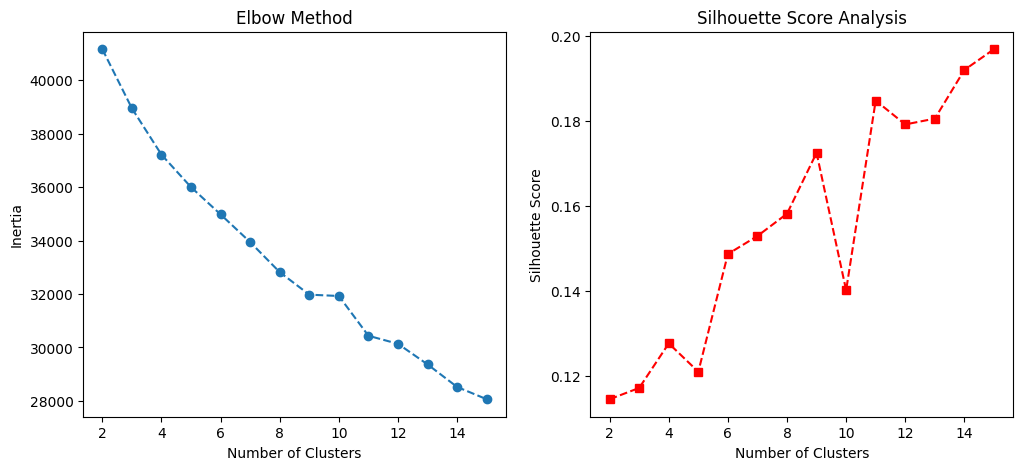

In [22]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# Sample embeddings (Replace with actual data)
# embeddings = np.array([...])  # Ensure this is a NumPy array of shape (n_samples, n_features)

def find_optimal_clusters(embeddings, max_k=15):
    inertia = []
    silhouette_scores = []

    for k in range(2, max_k + 1):
        kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
        kmeans.fit(embeddings)
        inertia.append(kmeans.inertia_)
        silhouette_scores.append(silhouette_score(embeddings, kmeans.labels_))

    # Plot Elbow Method
    plt.figure(figsize=(12, 5))
    
    plt.subplot(1, 2, 1)
    plt.plot(range(2, max_k + 1), inertia, marker='o', linestyle='--')
    plt.xlabel('Number of Clusters')
    plt.ylabel('Inertia')
    plt.title('Elbow Method')

    # Plot Silhouette Score
    plt.subplot(1, 2, 2)
    plt.plot(range(2, max_k + 1), silhouette_scores, marker='s', linestyle='--', color='red')
    plt.xlabel('Number of Clusters')
    plt.ylabel('Silhouette Score')
    plt.title('Silhouette Score Analysis')

    plt.show()

# Call function to visualize results
find_optimal_clusters(embeddings)


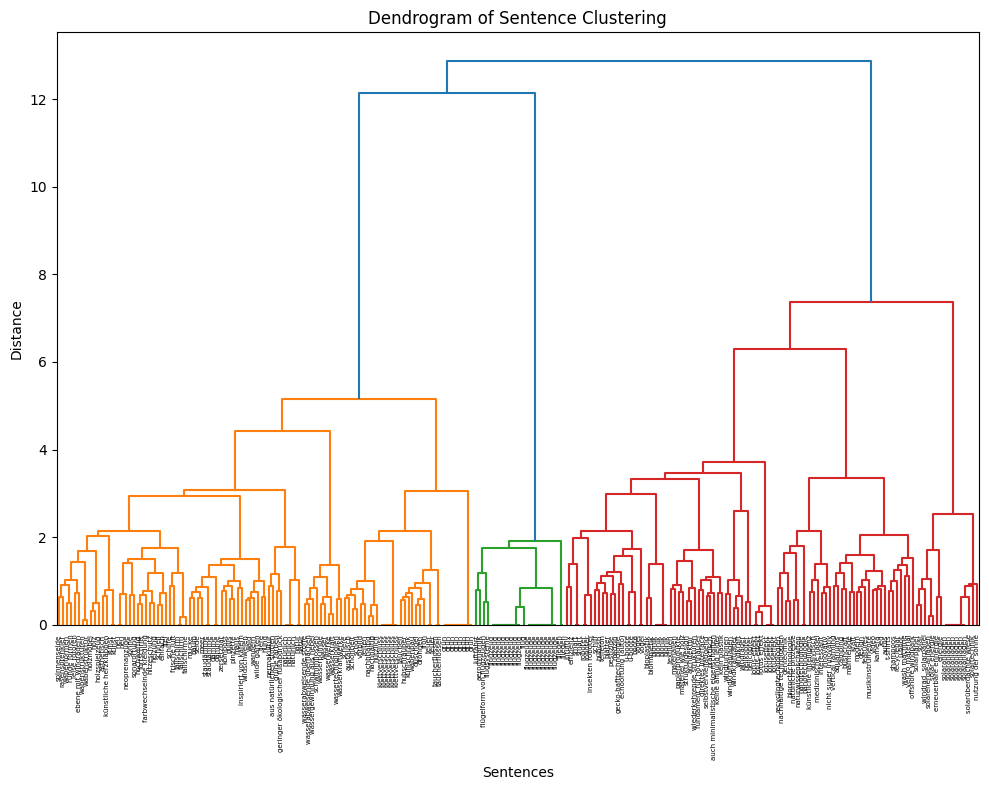

In [23]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics.pairwise import cosine_similarity
from scipy.cluster.hierarchy import dendrogram, linkage

# Calculate similarity matrix using cosine similarity
similarity_matrix = cosine_similarity(embeddings)

# Convert similarity matrix to a distance matrix
distance_matrix = 1 - similarity_matrix

# Perform hierarchical clustering
linked = linkage(distance_matrix, 'ward')

# Plot the dendrogram
plt.figure(figsize=(10, 8))
dendrogram(linked, labels=sentences, orientation='top', distance_sort='descending', show_leaf_counts=True)
plt.title("Dendrogram of Sentence Clustering")
plt.xlabel("Sentences")
plt.ylabel("Distance")
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

In [24]:
### appropriate number of clusters based on elbow and silhouette method
from sklearn.cluster import KMeans

# Choose the best k from the plots and apply KMeans
optimal_k = 6 # Change based on analysis
clustering_model = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
clustering_model.fit(embeddings)
cluster_assignment = clustering_model.labels_

# Organizing sentences into clusters
clustered_sentences = [[] for _ in range(optimal_k)]
for sentence_id, cluster_id in enumerate(cluster_assignment):
    clustered_sentences[cluster_id].append(sentences[sentence_id])

# Display results
for i, cluster in enumerate(clustered_sentences):
    print(f"Cluster {i + 1}:")
    print(cluster)
    print("")

Cluster 1:

[
    'biomimetik',
    'bionik',
    'bionik',
    'bionik',
    'bionik',
    'bioplastik',
    'bioroctechnologie',
    'gentechnik',
    'nanotechnologie',
    'nanotechnologie',
    'naturwissenschaften',
    'vertical farming'
]

Cluster 2:

[
    'aerodynamik',
    'fliegen',
    'fliegen',
    'flug',
    'flugsysteme',
    'flugzeug',
    'flugzeug',
    'flugzeug',
    'flugzeug',
    'flugzeug',
    'flugzeug',
    'flugzeug',
    'flugzeug',
    'flugzeuge',
    'flugzeuge',
    'flugzeuge',
    'flugzeuge',
    'flugzeuge',
    'flugzeuge',
    'flugzeuge',
    'flugzeuge',
    'flügelform von flugzeugen',
    'helicopter',
    'helikopter',
    'luftfahrt'
]

Cluster 3:

[
    'austausch',
    'baum',
    'blätter',
    'boote',
    'drohnen',
    'duschgel',
    'dämme',
    'dämme',
    'ebene mit windrädern',
    'fallschirm',
    'fallschirm',
    'fallschirme',
    'frei',
    'frische luft',
    'froh',
    'grün',
    'grün',
    'grün',
    'grün',
    'grün',
    'grün',
    'grün',
    'grün',
    'grüne farben',
    'heizung',
    'hitzeschutz',
    'holz',
    'holzmöbel',
    'holzspielzeug',
    'hubschrauber',
    'hund',
    'hübcsh',
    'inspiriert von käfern',
    'kamera',
    'klettverschluss',
    'klettverschluss',
    'klettverschluss',
    'klettverschluss',
    'klettverschluss',
    'kompost',
    'kraft',
    'kühlschrank',
    'leise rotoren',
    'marmelade',
    'maus',
    'medzin',
    'meer',
    'mucke',
    'neu',
    'neu',
    'pestizide',
    'pinzette',
    'pullis',
    'rasensprenkler',
    'reifen',
    'roboter',
    'roboter',
    'schere',
    'schiff',
    'schiffe',
    'schnell',
    'schön',
    'schönheit',
    'seide',
    'spinnenseide',
    'staudämme',
    'staudämme',
    'tauchen',
    'taucherflossen',
    'taucherflossen',
    'telfefon',
    'teuer',
    'teuer',
    'tiere',
    'u-boot',
    'u-boote',
    'u-boote',
    'vogel',
    'vorbild',
    'vögel',
    'wabenbau',
    'wald',
    'wandern',
    'wilde gärten',
    'wildschweien',
    'windräder',
    'zersetzbar'
]

Cluster 4:

[
    'analytisch',
    'aquariums',
    'architektur',
    'auch minimalistische eigenschaften',
    'aus natürlichen stoffen',
    'autos',
    'bushcraft',
    'camping',
    'design',
    'direktes interface',
    'echoortung (auto)',
    'effizienz',
    'einfach',
    'farbwechselnde kleidung',
    'features',
    'fortschritt',
    'fundament für hochhäuser',
    'gecko-hafttechnologie',
    'geringer ökologischer fußabdruck',
    'hochwertig',
    'innovativ',
    'insekten roboter',
    'interessant',
    'intuitiv',
    'kein plastik',
    'keine ahnung leider',
    'kunst',
    'kunst',
    'künstliche herzklappen',
    'künstliche intelligenz',
    'led',
    'materialien',
    'materiel wie holz',
    'medizinische nadel',
    'modern',
    'musikinstrumente',
    'nachhaltig',
    'nachhaltige technologien',
    'nachhhaltig',
    'natur',
    'natur',
    'natürlich',
    'natürlich',
    'natürlich',
    'natürliche prozesse',
    'neoprenanzüge',
    'nicht super innovativ',
    'nützlich',
    'papierprodukte',
    'permakultur',
    'praktisch',
    'recyclebar',
    'recyclingtechnologien',
    'runde formen',
    'schwimmflossen',
    'selbstvervielfätigend',
    'shampoos',
    'smart',
    'smart',
    'sonarortung',
    'strukturdesign',
    't-shirts',
    'textilien',
    'velcro material',
    'video',
    'wabenformen',
    'wabenstruktur',
    'wabenstrukturen',
    'wash machine',
    'wasser',
    'wasserabweisende oberflächen',
    'wasserabweisende stoffe',
    'wassergewinnung aus nebel',
    'wasserkraft',
    'wasserkraftwerke',
    'wasserpumpe',
    'wassertechnologien',
    'wasserwerke',
    'wiederkehrende strukturen',
    'ästhetisch'
]

Cluster 5:

[
    'energie',
    'erneuerbare ennergie',
    'nutzung der sonne',
    'offshore windpark',
    'solar',
    'solar energie',
    'solaranlagen',
    'solaranlagen',
    'solaranlagen',
    'solaranlagen',
    'solaranlagen',
    'solaranlagen',
    'solarenergie-anlagen',
    'solarpanel',
    'solartechnik',
    'solarüberdachte wiese',
    'sonne',
    'windkraft',
    'windkraftanlagen',
    'windkrafträder',
    'windrad  solarpanel',
    'windturbinen'
]

Cluster 6:

['lotus effekt', 'lotus-effekt', 'lotus-effekt', 'lotuseffekt', 'lotuseffekt', 'lotuseffekt']

In [25]:
len(clustered_sentences)

6

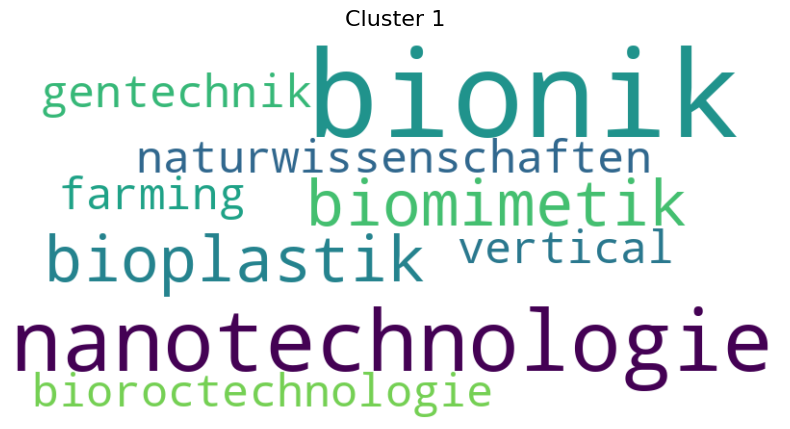

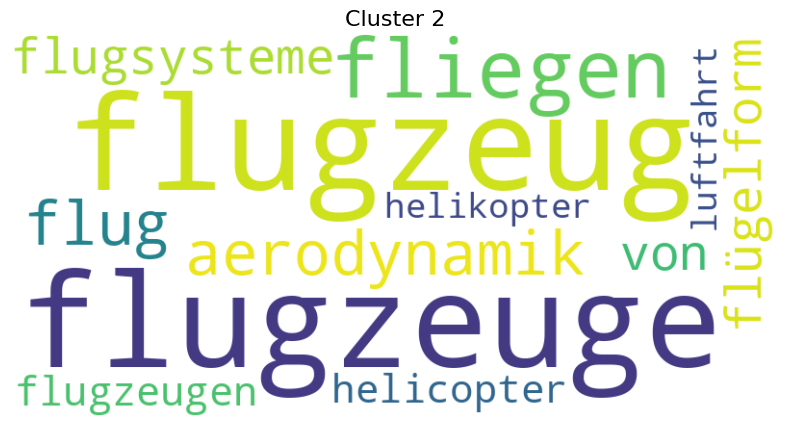

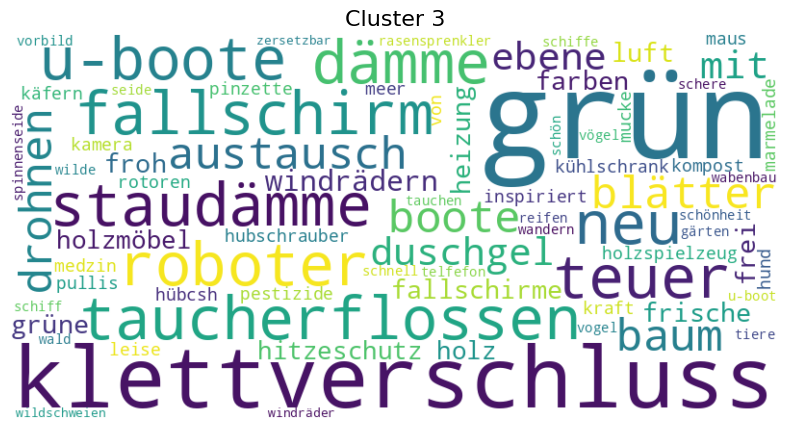

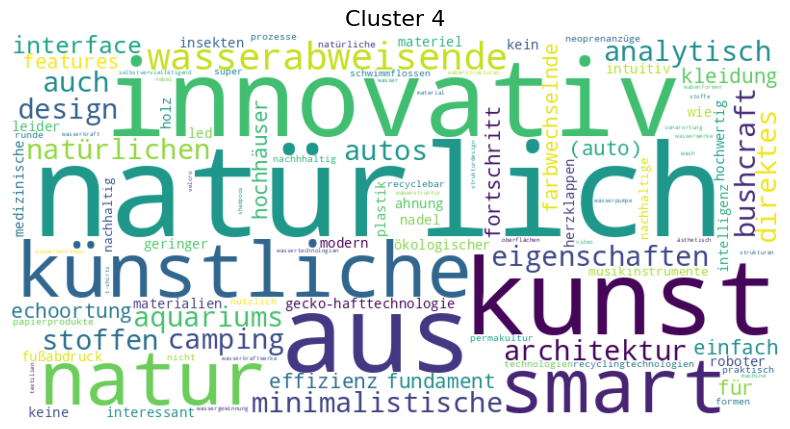

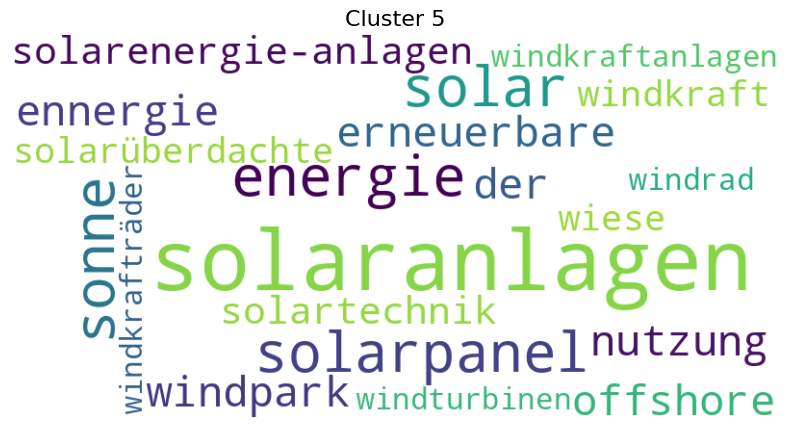

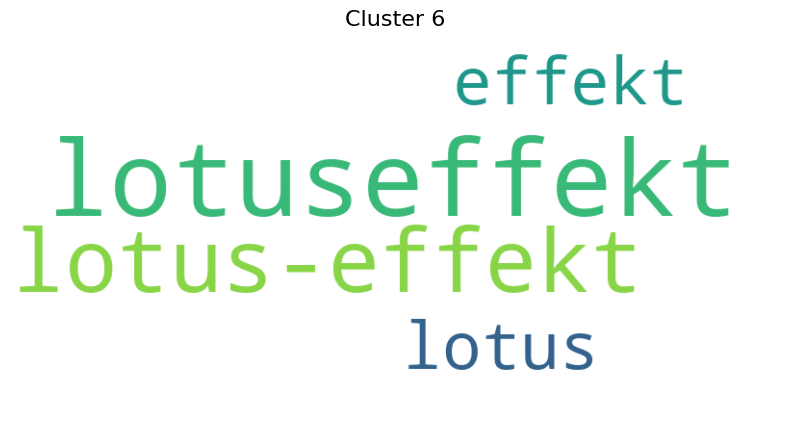

In [26]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from collections import Counter

# Create and display word clouds for each cluster
for i, cluster in enumerate(clustered_sentences):
    # Flatten all words into a single list (splitting on whitespace)
    all_words = []
    for phrase in cluster:
        words = phrase.lower().split()  # lowercasing for consistency
        all_words.extend(words)
    
    # Count word frequencies
    word_freq = Counter(all_words)
    
    # Generate the word cloud
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(word_freq)
    
    # Plot the word cloud
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(f'Cluster {i + 1}', fontsize=16)
    plt.show()

In [27]:
# Prompt for a bio-inspired technologies researcher
bioinspiration_system_content = (
    "You are a cognitive scientist and researcher in bio-inspired technologies with expertise in public perception, science communication, "
    "and affective-conceptual modeling. You specialize in analyzing semantic associations related to biomimicry, biomimetics, and bioinspired design. "
    "You apply models such as the biomimetic promise and naturalistic fallacy to interpret how laypeople perceive and evaluate bio-inspired technologies. "
    "You ensure scientifically neutral and theory-driven analysis based on hierarchical semantic mapping methods."
)

bioinspiration_user_content = '''
Please analyze the following cluster of free word associations in the context of public perceptions 
of bio-inspired and sustainable technologies. Your task is to extract the most salient and recurring conceptual themes, 
focusing on how individuals cognitively relate bio-inspired design to sustainability and innovation.

Use terminology from the bioinspiration literature, including the biomimetic promise, framing effects, and naturalistic fallacy. 
Base your thematic interpretation on structured association analysis methods (e.g., mini-snowball method, semantic network modeling).

Associations: {cluster_associations}

Return only the emergent key themes as bullet points, explaining each theme in one scientifically grounded sentence. 
Provide no further commentary.
'''

# Example of integrating with a model for Cluster 0
from huggingface_hub import InferenceClient
import textwrap
# from rich import print


client = InferenceClient(model="meta-llama/llama-3.3-70b-instruct", headers={"X-use-cache": "false"}, token=key.hugging_api_key)



for i, cluster in enumerate(clustered_sentences):
    print(f"Cluster {i + 1}:")
    print(", ".join(cluster))

    # Example: Running for the first cluster
    cluster_associations = ", ".join(clustered_sentences[i])  # Convert the first cluster's associations into a string
    formatted_user_content = bioinspiration_user_content.format(cluster_associations=cluster_associations)

    # Feed prompts into the model
    output = client.chat_completion(
        messages=[
            {"role": "system", "content": bioinspiration_system_content},
            {"role": "user", "content": formatted_user_content}
        ],
        stream=False,
        max_tokens=5000,
        temperature=0
    )

    # Accessing and formatting the output
    text = output.choices[0].message.content
    #print('\n'.join(textwrap.wrap(text, 100)))

    print(text)

Cluster 1:

biomimetik, bionik, bionik, bionik, bionik, bioplastik, bioroctechnologie, gentechnik, nanotechnologie, 
nanotechnologie, naturwissenschaften, vertical farming

* **Biomimetic Promise**: The prevalent associations with "bionik" and "bioplastik" suggest that individuals 
perceive bio-inspired design as a promising approach to developing sustainable and innovative technologies.
* **Naturalistic Fallacy**: The frequent co-occurrence of "naturwissenschaften" and "bionik" implies that people 
tend to attribute inherent value and sustainability to bio-inspired technologies due to their natural origins.
* **Technological Convergence**: The presence of "nanotechnologie" and "gentechnik" alongside bio-inspired terms 
indicates that individuals cognitively link bio-inspired design to other emerging technologies, framing them as 
interconnected and synergistic.
* **Sustainable Futures**: The association with "vertical farming" suggests that people relate bio-inspired design 
to visions of sustainable and environmentally conscious futures, where technology and nature coalesce to address 
ecological challenges.

Cluster 2:

aerodynamik, fliegen, fliegen, flug, flugsysteme, flugzeug, flugzeug, flugzeug, flugzeug, flugzeug, flugzeug, 
flugzeug, flugzeug, flugzeuge, flugzeuge, flugzeuge, flugzeuge, flugzeuge, flugzeuge, flugzeuge, flugzeuge, 
flügelform von flugzeugen, helicopter, helikopter, luftfahrt

* **Biomimetic Inspiration**: The prevalence of flight-related terms (e.g., fliegen, flug, flugzeug) suggests that 
individuals strongly associate bio-inspired design with aerodynamic innovations, reflecting the biomimetic promise 
of emulating nature to achieve technological advancements.
* **Aviation Dominance**: The overwhelming frequency of aviation-related words (e.g., flugzeug, helikopter, 
luftfahrt) indicates a framing effect where bio-inspired technologies are predominantly perceived through the lens 
of aerial transportation, potentially limiting the scope of sustainability and innovation associations.
* **Naturalistic Fallacy**: The emphasis on flight and aerodynamics may imply a naturalistic fallacy, where the 
public assumes that bio-inspired designs, such as those mimicking bird flight, are inherently sustainable and 
environmentally friendly, without considering the actual environmental impact of these technologies.
* **Technological Fixation**: The focus on specific technological applications (e.g., flugzeug, helicopter) rather 
than broader sustainability concepts suggests that individuals may view bio-inspired design primarily as a means to
improve existing technologies, rather than a catalyst for systemic innovation and environmental change.

Cluster 3:

austausch, baum, blätter, boote, drohnen, duschgel, dämme, dämme, ebene mit windrädern, fallschirm, fallschirm, 
fallschirme, frei, frische luft, froh, grün, grün, grün, grün, grün, grün, grün, grün, grüne farben, heizung, 
hitzeschutz, holz, holzmöbel, holzspielzeug, hubschrauber, hund, hübcsh, inspiriert von käfern, kamera, 
klettverschluss, klettverschluss, klettverschluss, klettverschluss, klettverschluss, kompost, kraft, kühlschrank, 
leise rotoren, marmelade, maus, medzin, meer, mucke, neu, neu, pestizide, pinzette, pullis, rasensprenkler, reifen,
roboter, roboter, schere, schiff, schiffe, schnell, schön, schönheit, seide, spinnenseide, staudämme, staudämme, 
tauchen, taucherflossen, taucherflossen, telfefon, teuer, teuer, tiere, u-boot, u-boote, u-boote, vogel, vorbild, 
vögel, wabenbau, wald, wandern, wilde gärten, wildschweien, windräder, zersetzbar

* **Nature as Inspiration**: The prevalence of words like "baum", "blätter", "grün", and "tiere" suggests that 
individuals cognitively relate bio-inspired design to the natural world, reflecting the biomimetic promise of 
innovation through emulation of nature.
* **Sustainability and Environmentalism**: The frequent appearance of terms like "grün", "kompost", "windräder", 
and "zersetzbar" indicates a strong association between bio-inspired technologies and sustainable, eco-friendly 
practices, potentially driven by a naturalistic fallacy where natural equals good.
* **Innovation and Technology**: The presence of words like "drohnen", "hubschrauber", "roboter", and "kamera" 
reveals a connection between bio-inspired design and cutting-edge technology, highlighting the role of framing 
effects in shaping public perceptions of bio-inspired innovation.
* **Biomimicry in Materials and Design**: The repetition of terms like "klettverschluss", "spinnenseide", and 
"holz" implies a focus on the development of novel materials and design solutions inspired by nature, illustrating 
the potential for bio-inspired technologies to drive material innovation.
* **Freedom and Well-being**: The emergence of words like "frei", "frische luft", and "schön" suggests that 
individuals associate bio-inspired technologies with enhanced quality of life, personal freedom, and aesthetic 
appeal, reflecting a broader cultural narrative around the benefits of sustainable innovation.

Cluster 4:

analytisch, aquariums, architektur, auch minimalistische eigenschaften, aus natürlichen stoffen, autos, bushcraft, 
camping, design, direktes interface, echoortung (auto), effizienz, einfach, farbwechselnde kleidung, features, 
fortschritt, fundament für hochhäuser, gecko-hafttechnologie, geringer ökologischer fußabdruck, hochwertig, 
innovativ, insekten roboter, interessant, intuitiv, kein plastik, keine ahnung leider, kunst, kunst, künstliche 
herzklappen, künstliche intelligenz, led, materialien, materiel wie holz, medizinische nadel, modern, 
musikinstrumente, nachhaltig, nachhaltige technologien, nachhhaltig, natur, natur, natürlich, natürlich, natürlich,
natürliche prozesse, neoprenanzüge, nicht super innovativ, nützlich, papierprodukte, permakultur, praktisch, 
recyclebar, recyclingtechnologien, runde formen, schwimmflossen, selbstvervielfätigend, shampoos, smart, smart, 
sonarortung, strukturdesign, t-shirts, textilien, velcro material, video, wabenformen, wabenstruktur, 
wabenstrukturen, wash machine, wasser, wasserabweisende oberflächen, wasserabweisende stoffe, wassergewinnung aus 
nebel, wasserkraft, wasserkraftwerke, wasserpumpe, wassertechnologien, wasserwerke, wiederkehrende strukturen, 
ästhetisch

* **Biomimetic Promise**: The associations reveal a strong expectation that bio-inspired design will lead to 
innovative, efficient, and sustainable solutions, reflecting the biomimetic promise of leveraging nature to drive 
technological advancements.
* **Naturalistic Fallacy**: The frequent occurrence of terms like "natur", "natürlich", and "natürliche Prozesse" 
suggests that individuals often equate bio-inspired design with inherent environmental benefits, illustrating the 
naturalistic fallacy of assuming naturalness implies sustainability.
* **Sustainability Framing**: The associations indicate that bio-inspired design is often framed as a means to 
achieve sustainability, with recurring themes of "nachhaltig", "geringer ökologischer Fußabdruck", and "recyclebar"
highlighting the perceived environmental benefits of bio-inspired technologies.
* **Material Inspiration**: The emphasis on materials like "holz", "wasserabweisende Stoffe", and "velcro Material"
demonstrates how individuals draw inspiration from natural materials and their properties to inform bio-inspired 
design and innovation.
* **Efficiency and Simplicity**: The associations "effizienz", "einfach", and "minimalistische Eigenschaften" 
suggest that individuals value the potential of bio-inspired design to create efficient, simple, and intuitive 
solutions that minimize environmental impact.
* **Technological Innovation**: The presence of terms like "künstliche Intelligenz", "insekten Roboter", and 
"sonarortung" indicates that bio-inspired design is perceived as a driver of technological innovation, with 
potential applications in various fields, including medicine, transportation, and energy.

Cluster 5:

energie, erneuerbare ennergie, nutzung der sonne, offshore windpark, solar, solar energie, solaranlagen, 
solaranlagen, solaranlagen, solaranlagen, solaranlagen, solaranlagen, solarenergie-anlagen, solarpanel, 
solartechnik, solarüberdachte wiese, sonne, windkraft, windkraftanlagen, windkrafträder, windrad  solarpanel, 
windturbinen

* **Renewable Energy**: The dominant theme of renewable energy emerges, indicating that individuals strongly 
associate bio-inspired design with sustainable energy sources, such as solar and wind power, which is consistent 
with the biomimetic promise of environmentally friendly innovations.
* **Solar Energy**: The frequent mentions of solar-related terms suggest that people cognitively link bio-inspired 
technologies to solar energy, reflecting a framing effect where solar energy is perceived as a key aspect of 
sustainable and innovative solutions.
* **Nature-Based Solutions**: The associations with natural elements like the sun and wind imply that individuals 
relate bio-inspired design to nature-based solutions, which may be influenced by the naturalistic fallacy, where 
naturalness is equated with goodness and sustainability.
* **Technological Innovations**: The presence of terms like solar panels, wind turbines, and solar technology 
indicates that people associate bio-inspired design with technological innovations, highlighting the perceived 
connection between bio-inspired solutions and advanced, sustainable technologies.

Cluster 6:

lotus effekt, lotus-effekt, lotus-effekt, lotuseffekt, lotuseffekt, lotuseffekt

* **Biomimetic promise**: The repetition of "lotus effekt" associations suggests that individuals strongly link 
bio-inspired design to the promise of innovative, sustainable solutions, as exemplified by the self-cleaning 
properties of the lotus leaf.
* **Naturalistic fallacy**: The dominant presence of "lotus effekt" implies that people may be prone to the 
naturalistic fallacy, assuming that bio-inspired technologies are inherently sustainable and environmentally 
friendly due to their natural origins.
* **Framing effects**: The consistent reference to the "lotus effekt" indicates that the framing of bio-inspired 
technologies in terms of their natural counterparts can influence public perceptions, emphasizing the potential 
benefits and appeal of sustainable innovation.
* **Bio-inspired innovation**: The salience of "lotus effekt" associations highlights the cognitive connection 
between bio-inspired design and innovative problem-solving, underscoring the potential of biomimicry to drive 
sustainable technological advancements.